In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.cluster import KMeans
from functions import *
import random
from itertools import combinations


df = pd.read_csv('df_audio_features_5000.csv')
df.columns = df.columns.str.strip()
df2 = df.copy()
df2.drop(['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'liveness', 'key', 'mode', 'duration_ms', 'time_signature', 'type', 'loudness'], axis=1, inplace=True)

IQR = df.duration_ms.describe()['75%'] - df.duration_ms.describe()['25%']
df = df.loc[(df.duration_ms >= (df.duration_ms.describe()['mean'] - 1.5*IQR)) & (df.duration_ms <= (df.duration_ms.describe()['mean'] + 1.5*IQR))]
df.set_index(['name', 'artist'], inplace=True)
df.drop(['html', 'id', 'liveness', 'key', 'mode', 'duration_ms', 'time_signature', 'type', 'loudness'], axis=1, inplace=True)

#### plot distribution of normalized features

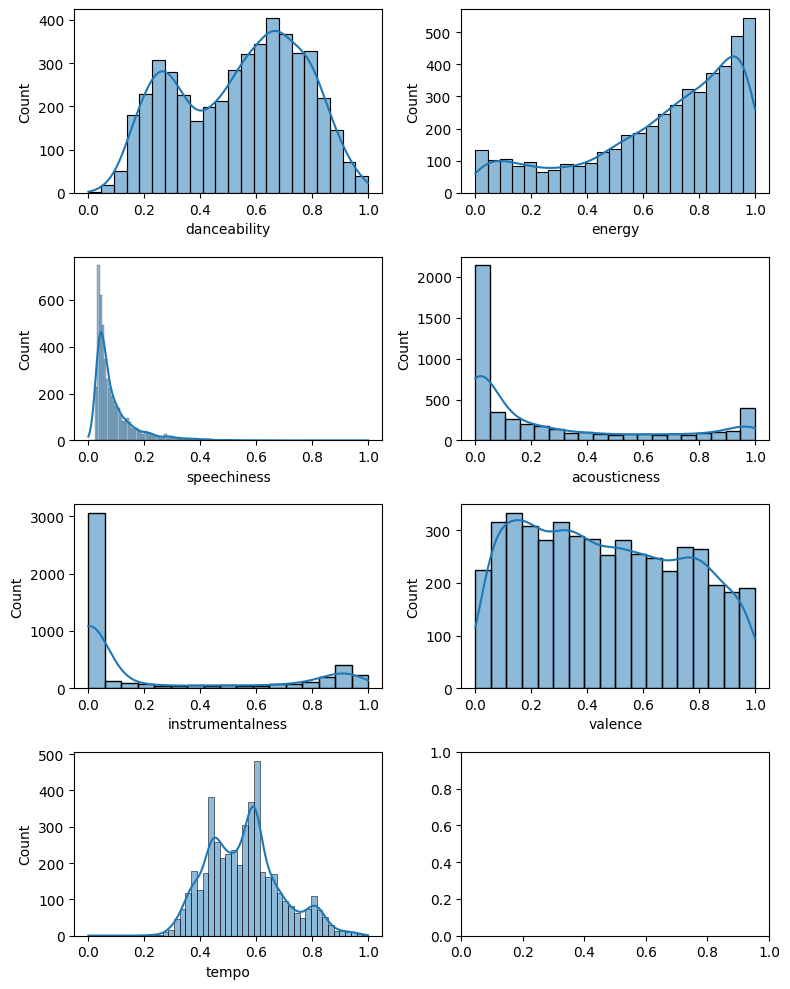

In [ ]:
# plotting_dist(DataFrame, method=MinMaxScaler())
plot_dist(df)

#### dropping additional features

In [ ]:
# df.drop('instrumentalness', axis=1, inplace=True)

#### scaling data

In [ ]:
# choose MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()
normal_df = scale(df)

#### The silhouette coefficient

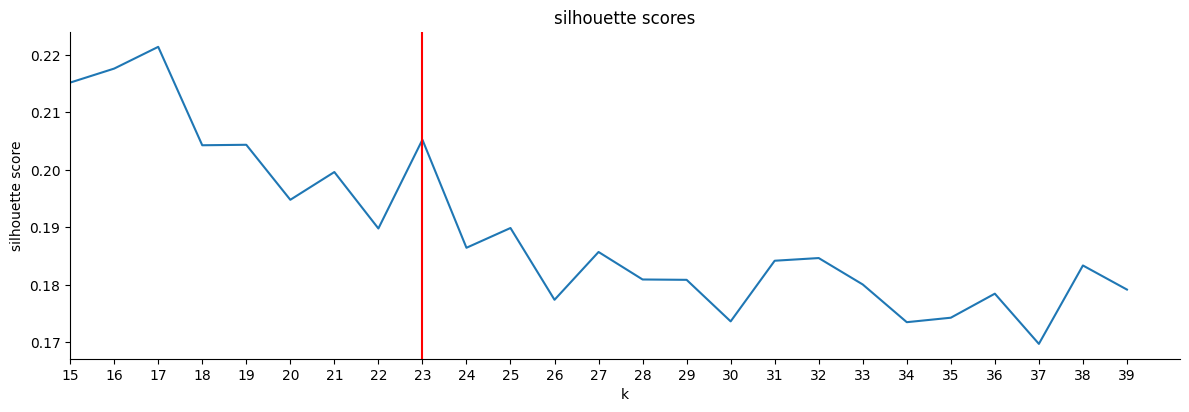

In [ ]:
rand, k = get_k(normal_df, 22, 28, iterations=10)

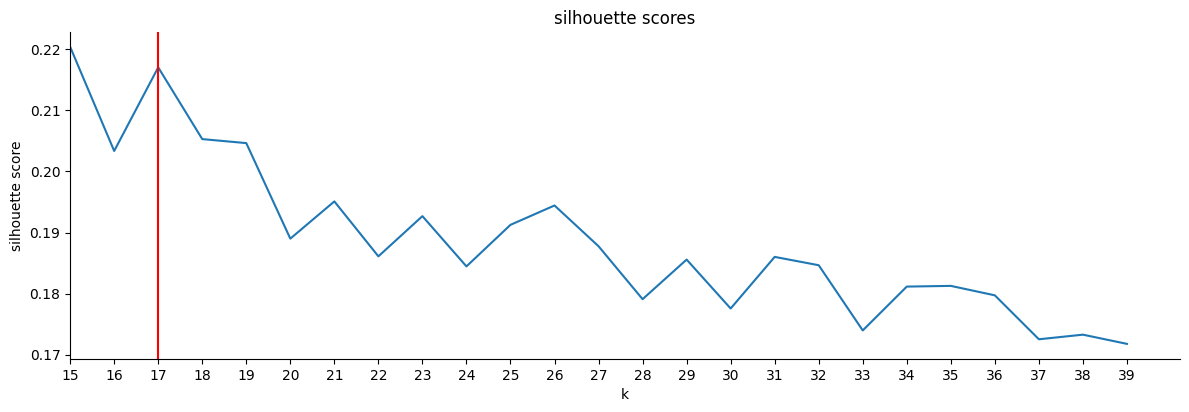

In [ ]:
rand = 34731366
k = 17

final_silhouette_list = get_silhouette_list(normal_df, 15, 40, rstate=rand)
ar = np.array(final_silhouette_list[5:])
indices = np.where(ar == ar.max())
# k = int(indices[0]) +20
plot_silhouette_list(final_silhouette_list, 15, k)

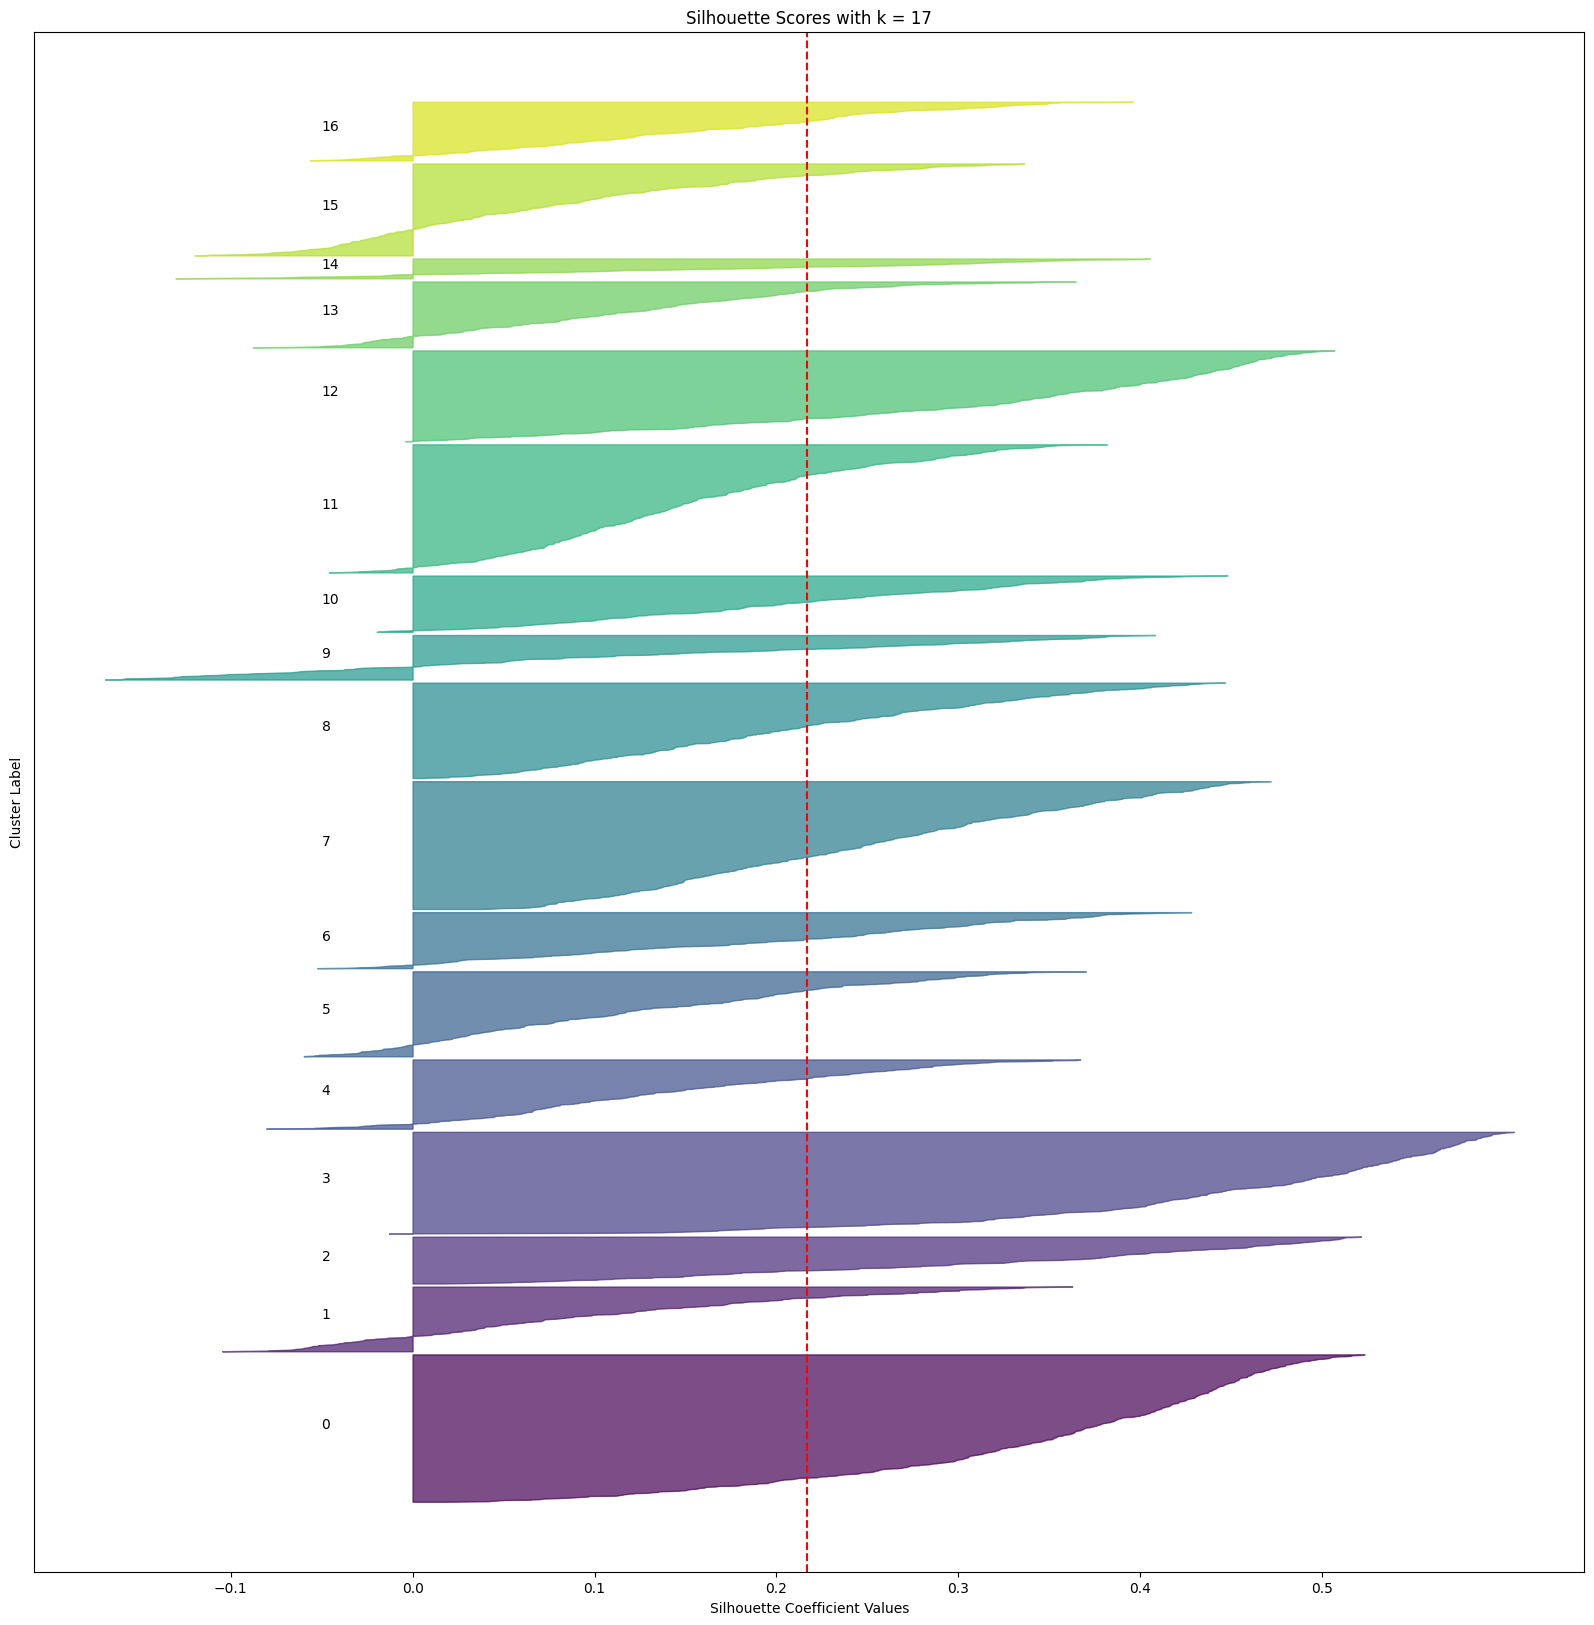

In [ ]:
plot_silhouette_scores(k, normal_df, rstate=rand)

#### Clustering using KMeans & removal of unfitting songs

In [ ]:
# Clustering using KMeans // cluster(Dataframe, k_cluster, scaling_method=MinMaxScaler())
df_c = cluster(normal_df.copy(), k, rstate=rand, reduce_size=50)

There are now 16 playlists with 50 Songs.


In [ ]:
df_c.loc[df_c.cluster==9]

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
Rock The House,Afrojack,0.713547,0.841842,0.094553,0.017871,0.802030,0.547208,0.607748,9
My Girlfriend's Girlfriend,Type O Negative,0.557394,0.762763,0.036928,0.158635,0.921827,0.671066,0.533109,9
Go (Radio Edit),Moby,0.691830,0.848849,0.054466,0.000053,0.945178,0.522843,0.588256,9
Only for the Weak,In Flames,0.473630,0.909910,0.048584,0.000002,0.769543,0.497462,0.490710,9
Cor pelut,Les Sueques,0.628749,0.903904,0.168845,0.011446,0.798985,0.532995,0.682952,9
Red Eyes,The War On Drugs,0.433299,0.880881,0.032789,0.029618,0.889340,0.528934,0.704668,9
Anti-Tank (Dead Armour),Bolt Thrower,0.459152,0.871872,0.048584,0.000002,0.743147,0.462944,0.588593,9
Cannonball,Showtek,0.697001,0.911912,0.080719,0.002410,0.831472,0.477157,0.598187,9
Cleaning Day,Altar,0.457084,0.968969,0.080610,0.000338,0.909645,0.503553,0.529618,9


In [ ]:
link_df = create_link_df(df_c, df2)

In [ ]:
df_c

,,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,
Postmortem Procedures,Exhumed,0.259566,0.943944,0.130719,0.000003,0.893401,0.247716,0.541544,0
Night Of The Vampire,Entombed,0.197518,0.954955,0.105773,0.000013,0.921827,0.207107,0.554862,0
Anatomy of the Beast,Intestine Baalism,0.205791,0.926927,0.114379,0.000083,0.958376,0.181726,0.537698,0
Limb from Limb,Exhumed,0.240951,0.921922,0.174292,0.000011,0.858883,0.212183,0.560307,0
Casketkrusher,Exhumed,0.270941,0.909910,0.128540,0.000001,0.923858,0.135025,0.544016,0
...,...,...,...,...,...,...,...,...,...
Zamba del Carnaval,Hernán Ríos,0.650465,0.482482,0.027560,0.831325,0.000483,0.672081,0.513837,15
Cathy's Clown - 2007 Remaster,The Everly Brothers,0.524302,0.561562,0.038453,0.550201,0.000000,0.903553,0.560970,15
Hard to Handle,Otis Redding,0.688728,0.550551,0.066667,0.575301,0.000002,0.975635,0.446526,15


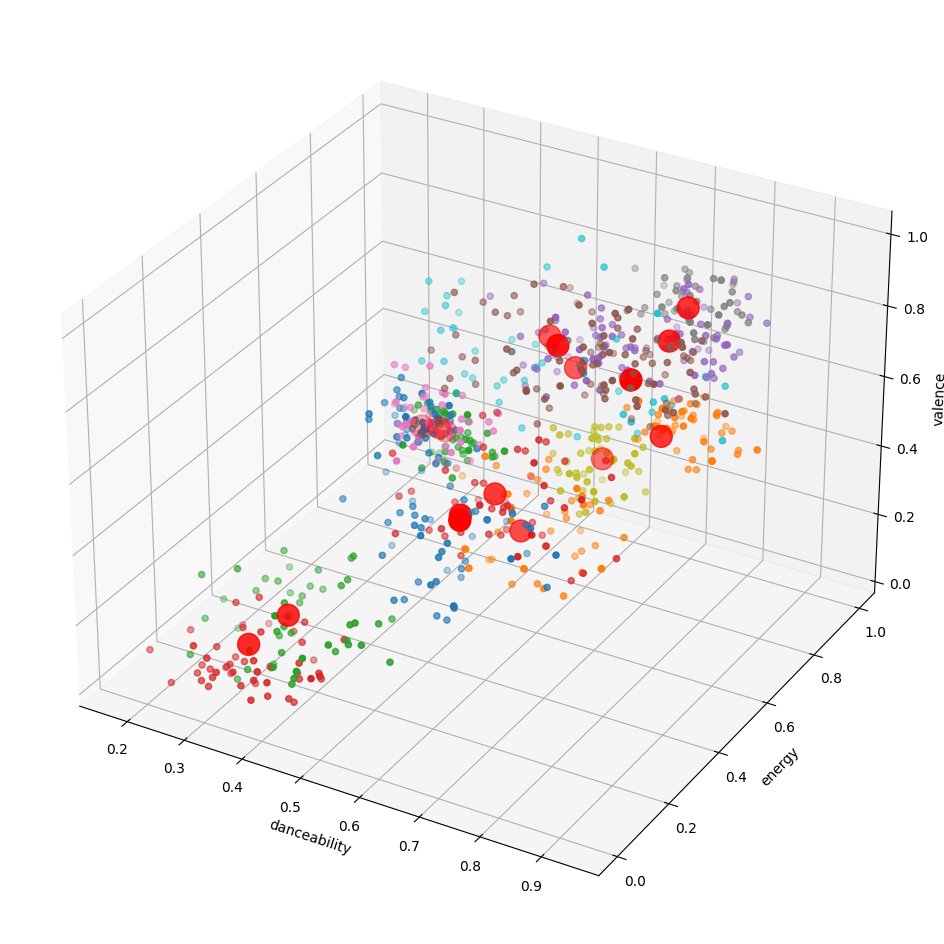

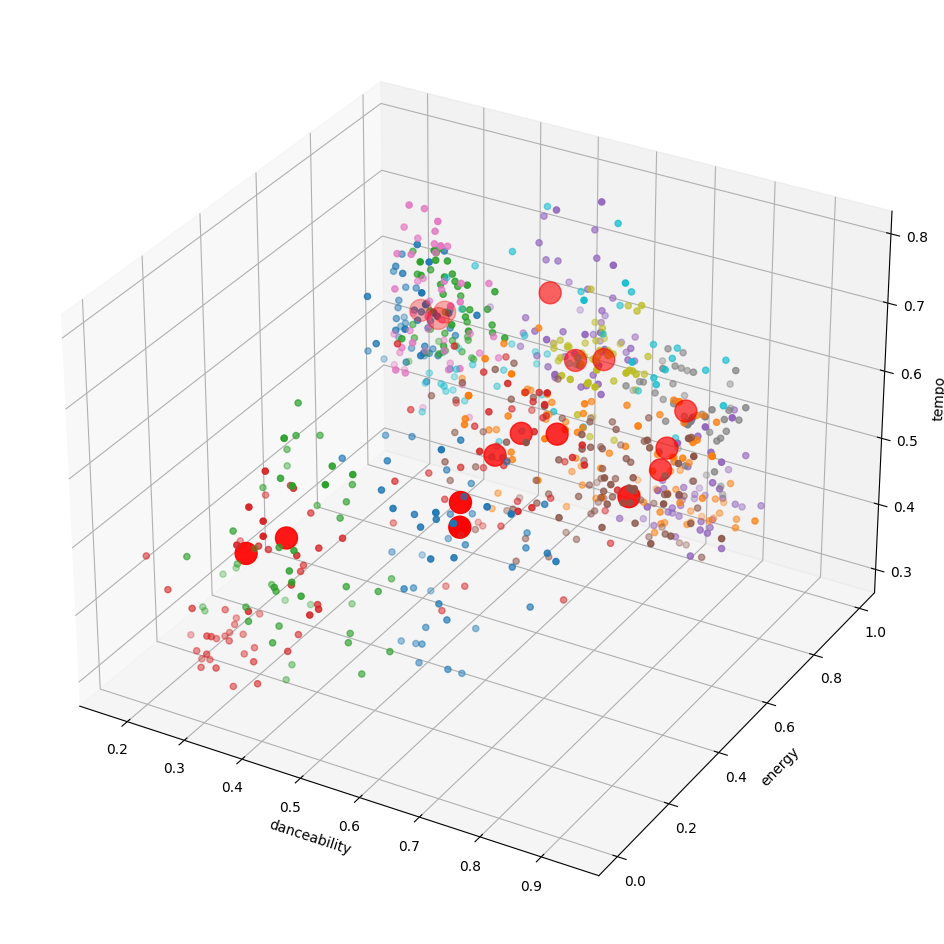

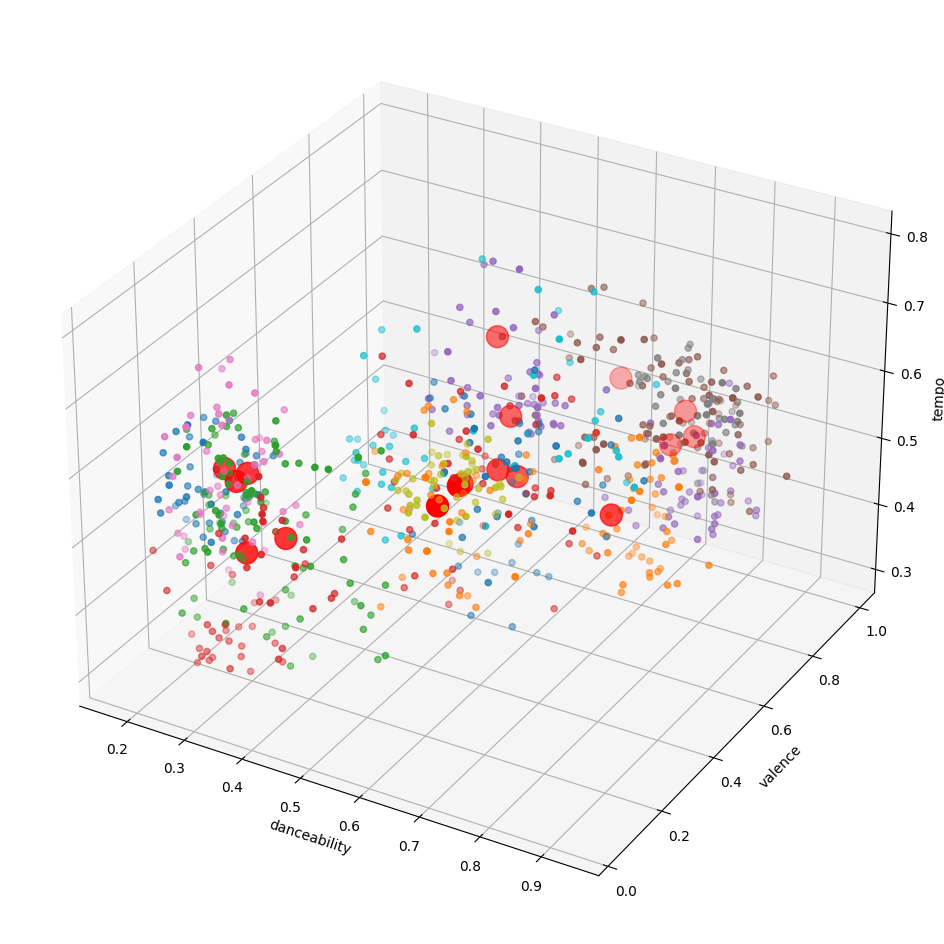

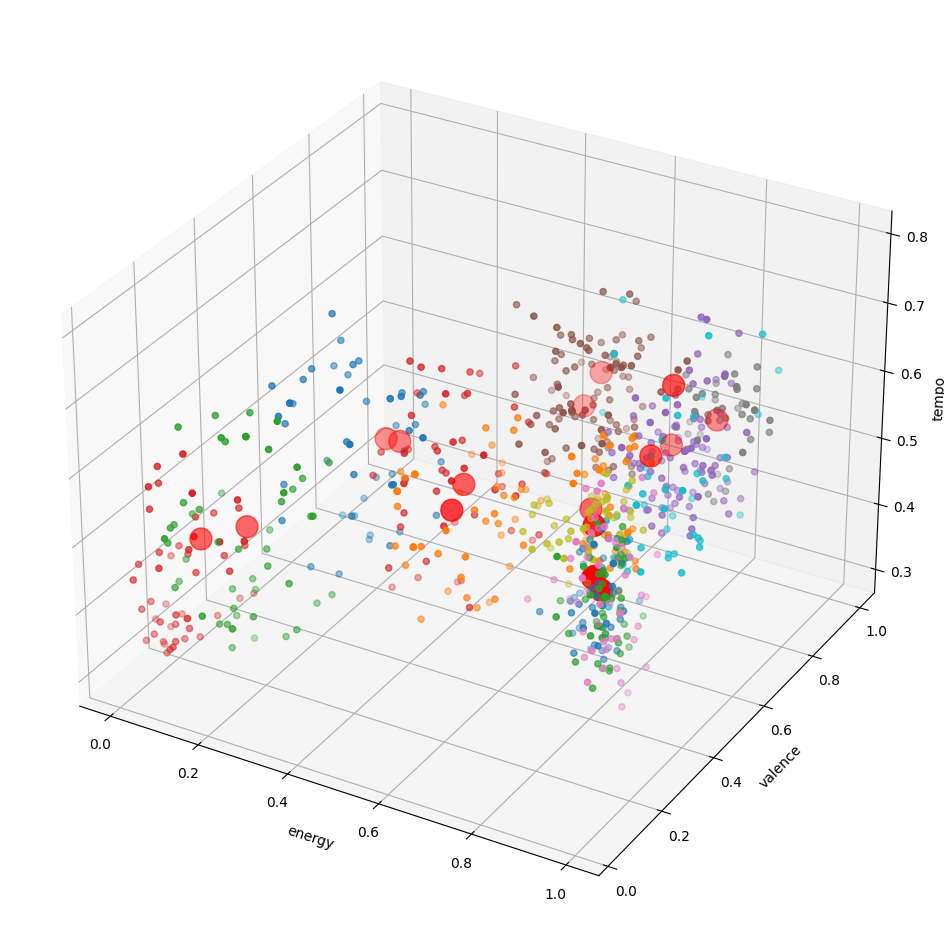

In [ ]:
for i in combinations(['danceability', 'energy', 'valence', 'tempo'],3):
    plot_3d(df_c, normal_df, k, rand, i)

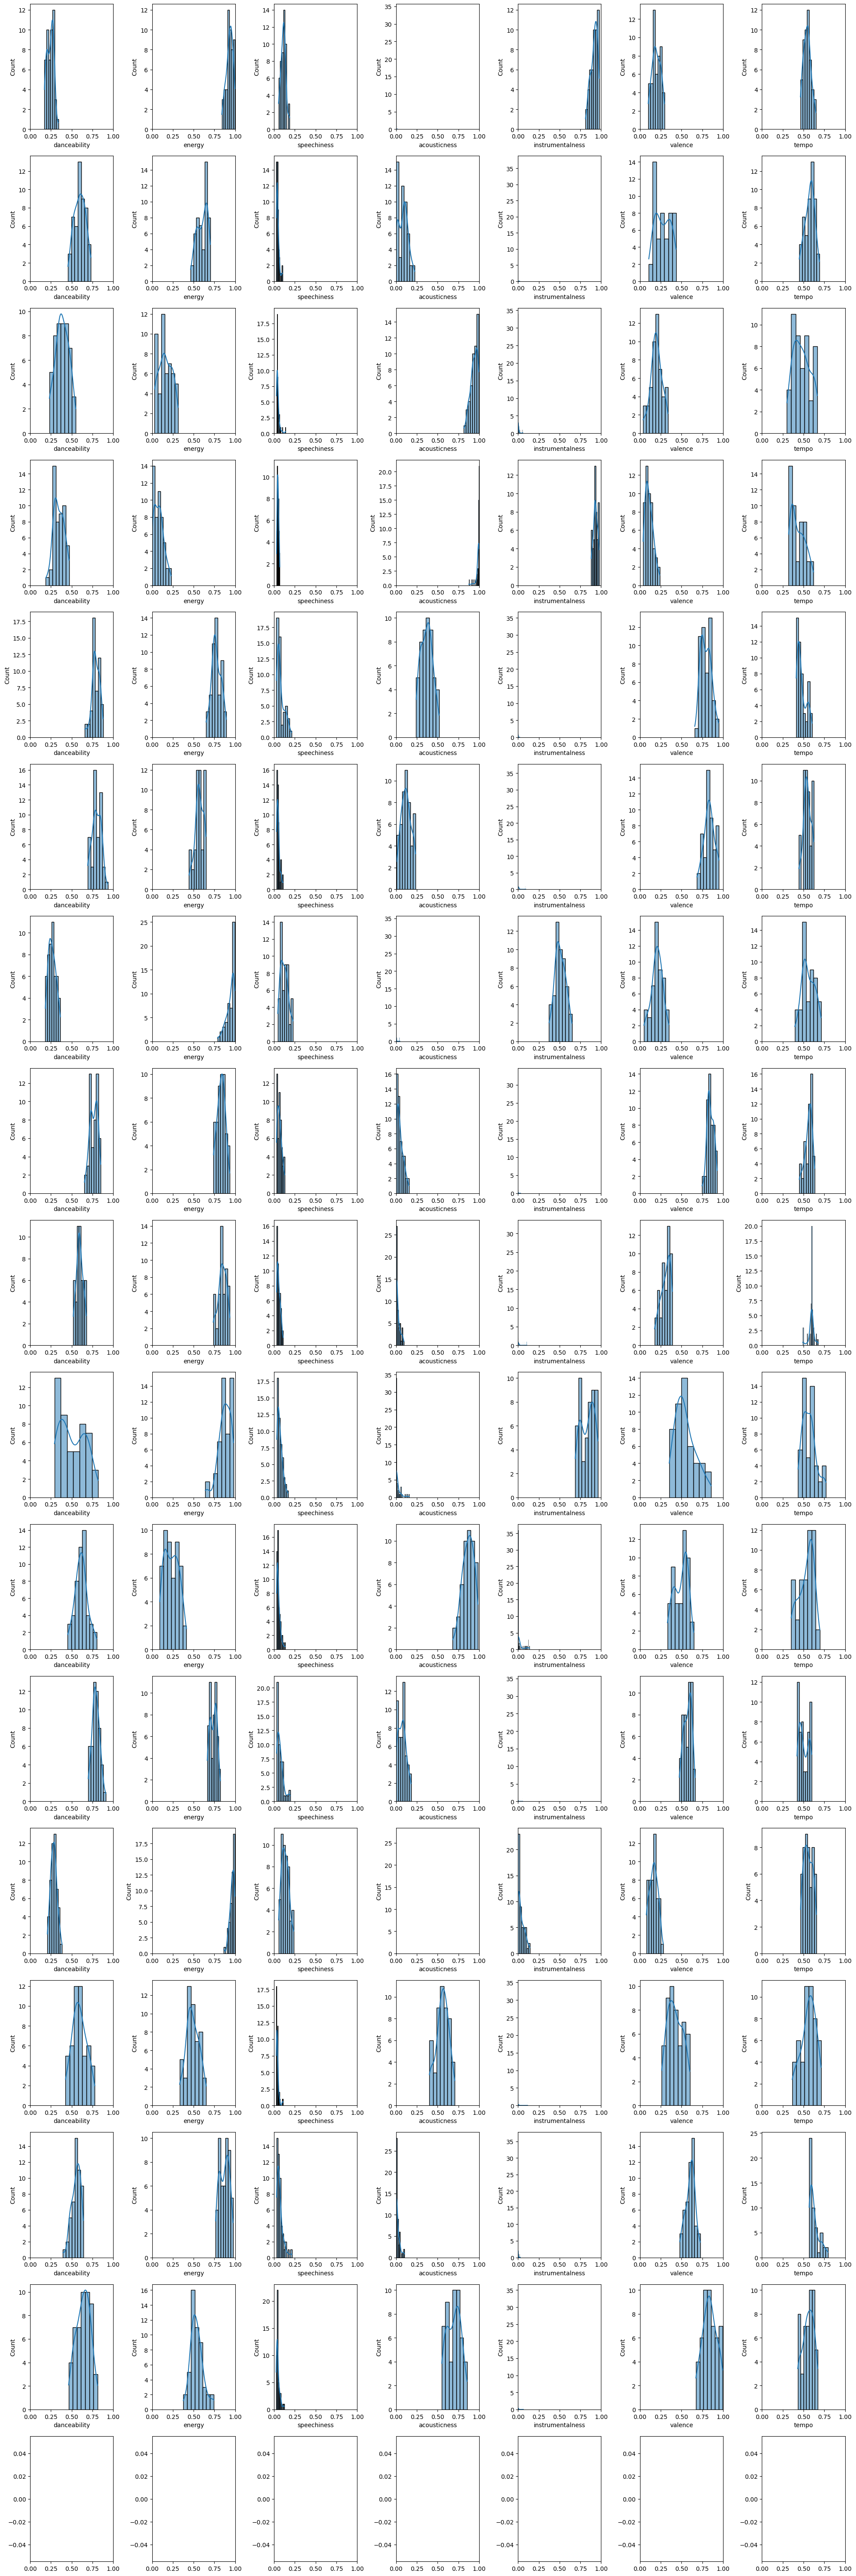

In [ ]:

fig,axs = plt.subplots(k,7, figsize = (20,60))
for i in range(k):
    for j in range(7):
        sns.histplot(data=df_c.loc[df_c.cluster==i][df_c.columns[j]], kde=True, ax=axs[i, j]).set(xlim=(0, 1))
fig.tight_layout()

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
model = KMeans(k, random_state=rand)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

model.fit(normal_df) # "scaled" is my scaled dataframe
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(normal_df)        # Fit the data to the visualizer
visualizer.show()